# Introduction - Advanced session

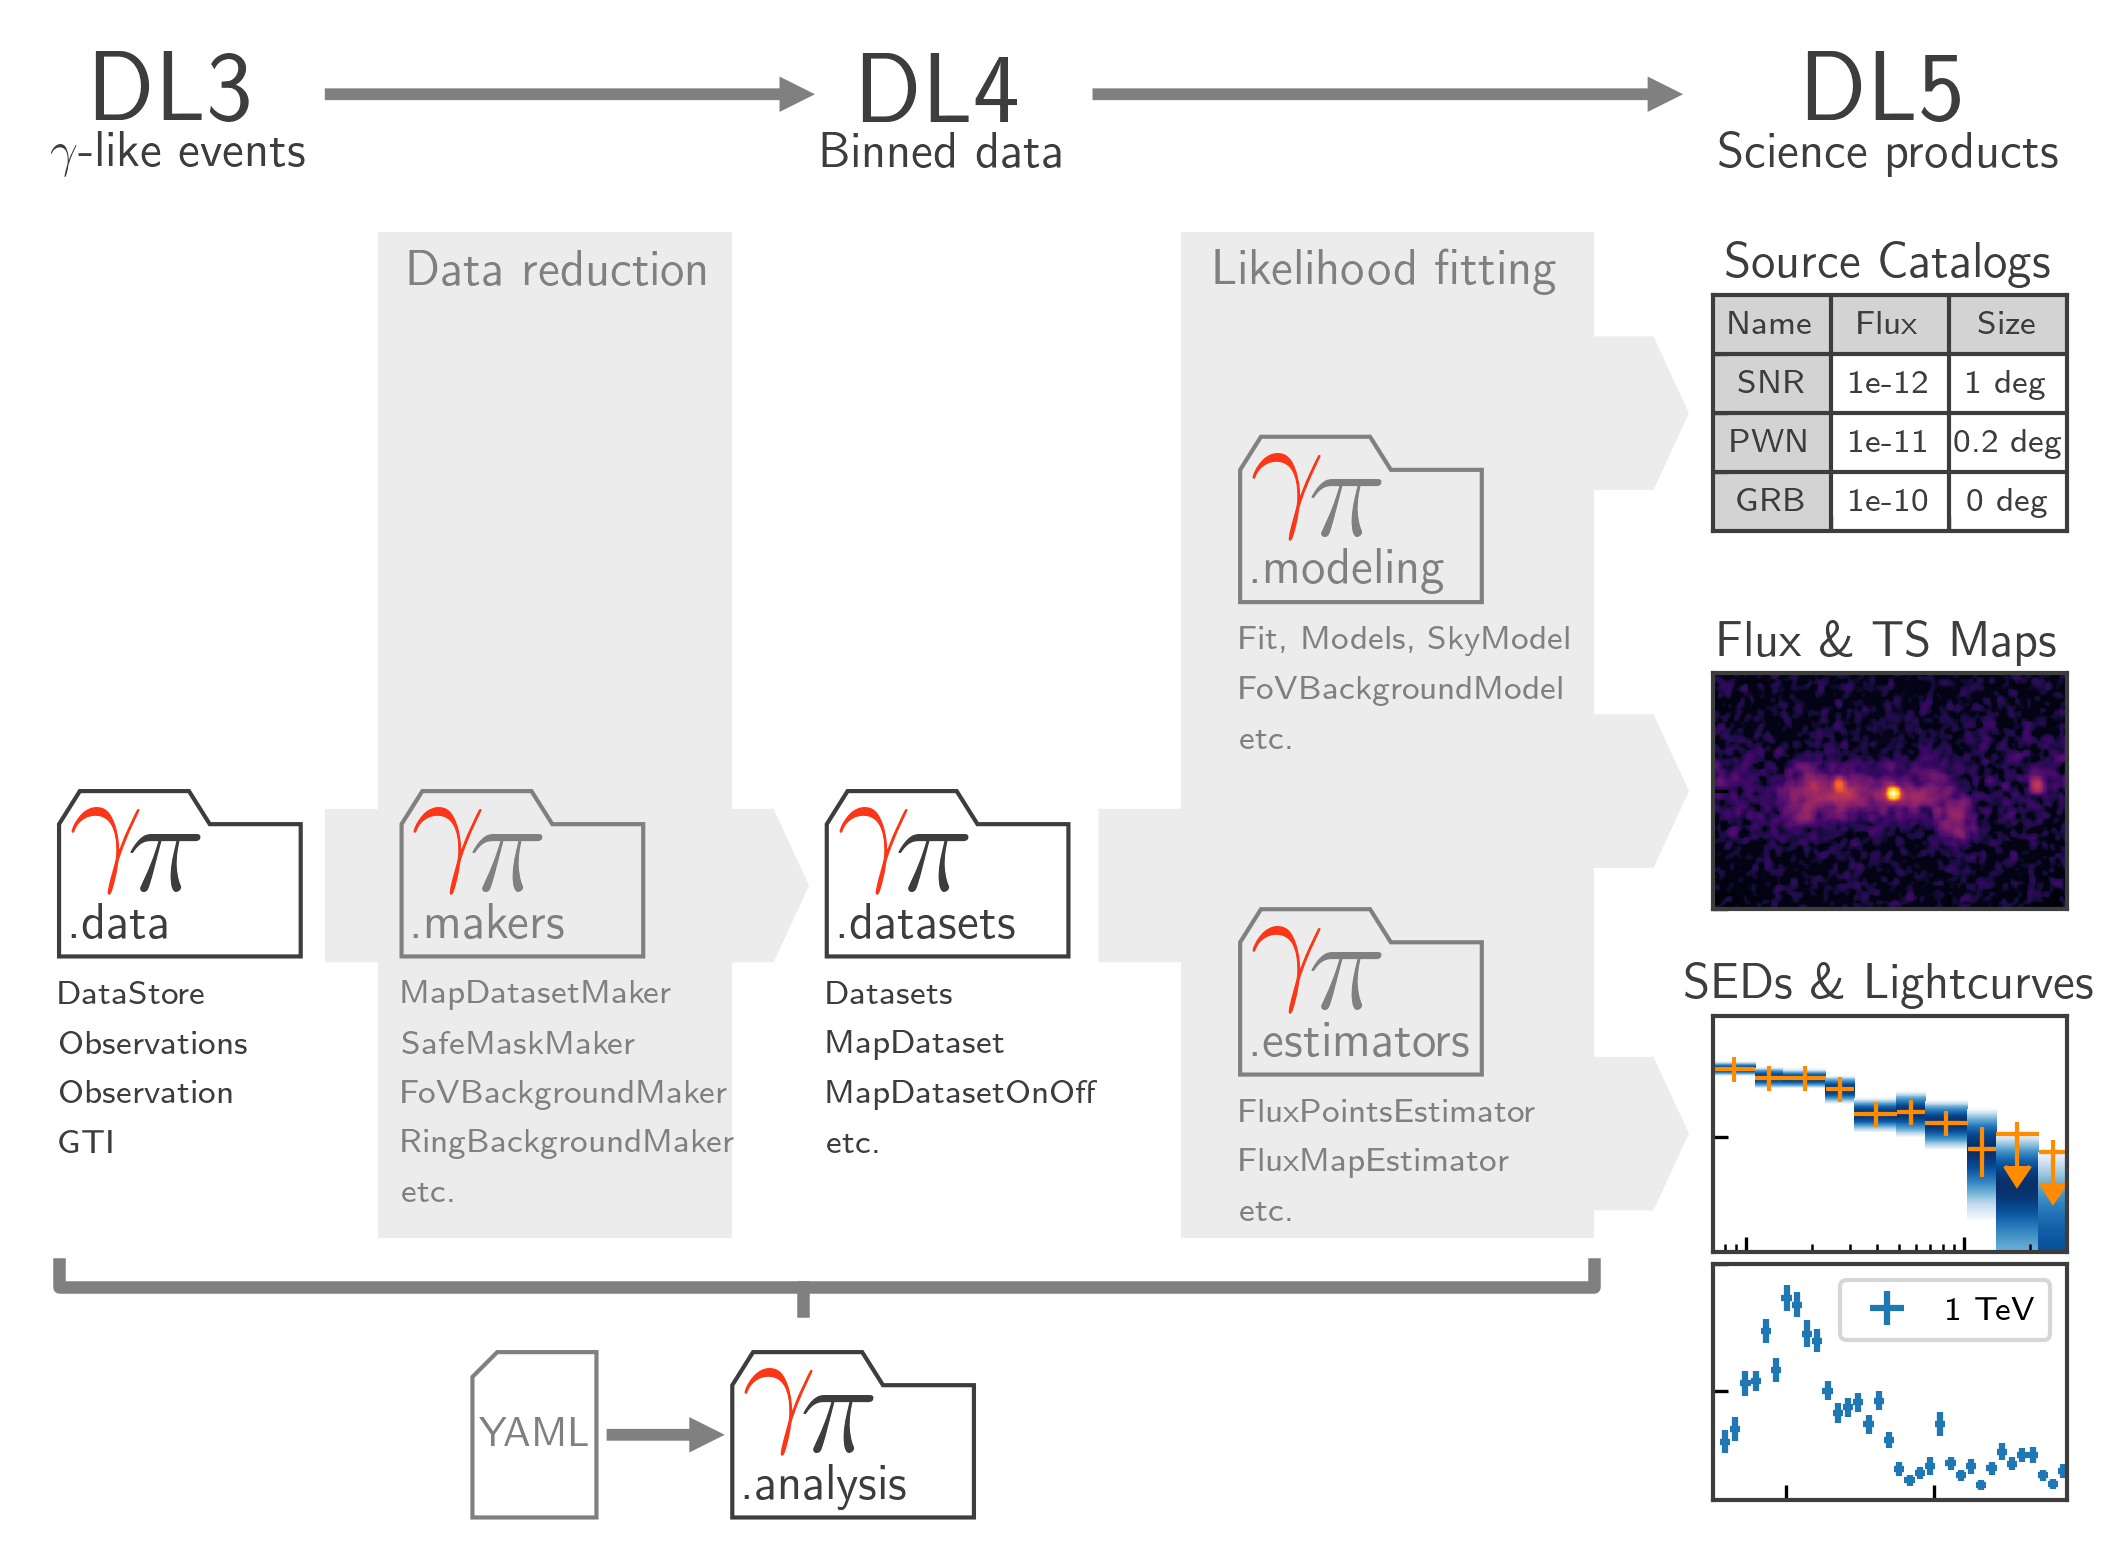

## 1. The DL3 data model

- Event lists and Instrument Response Functions
- Data and IRF model from the GADF: https://gamma-astro-data-formats.readthedocs.io/en/v0.3/

- `point-like` and `full-enclosure` IRFs

In [27]:
from gammapy.data import EventList, GTI, Observations, DataStore
from gammapy.irf import *

### Full enclosure irf

In [45]:
data_store_hess = DataStore.from_dir("$GAMMAPY_DATA/hess-dl3-dr1")
data_store_hess.info()

Data store:
HDU index table:
BASE_DIR: /home/atreyeesinha/Work/gammapy-datasets/1.2/hess-dl3-dr1
Rows: 630
OBS_ID: 20136 -- 47829
HDU_TYPE: ['aeff', 'bkg', 'edisp', 'events', 'gti', 'psf']
HDU_CLASS: ['aeff_2d', 'bkg_3d', 'edisp_2d', 'events', 'gti', 'psf_table']


Observation table:
Observatory name: 'N/A'
Number of observations: 105



In [46]:
obs_hess = data_store_hess.obs(23559)

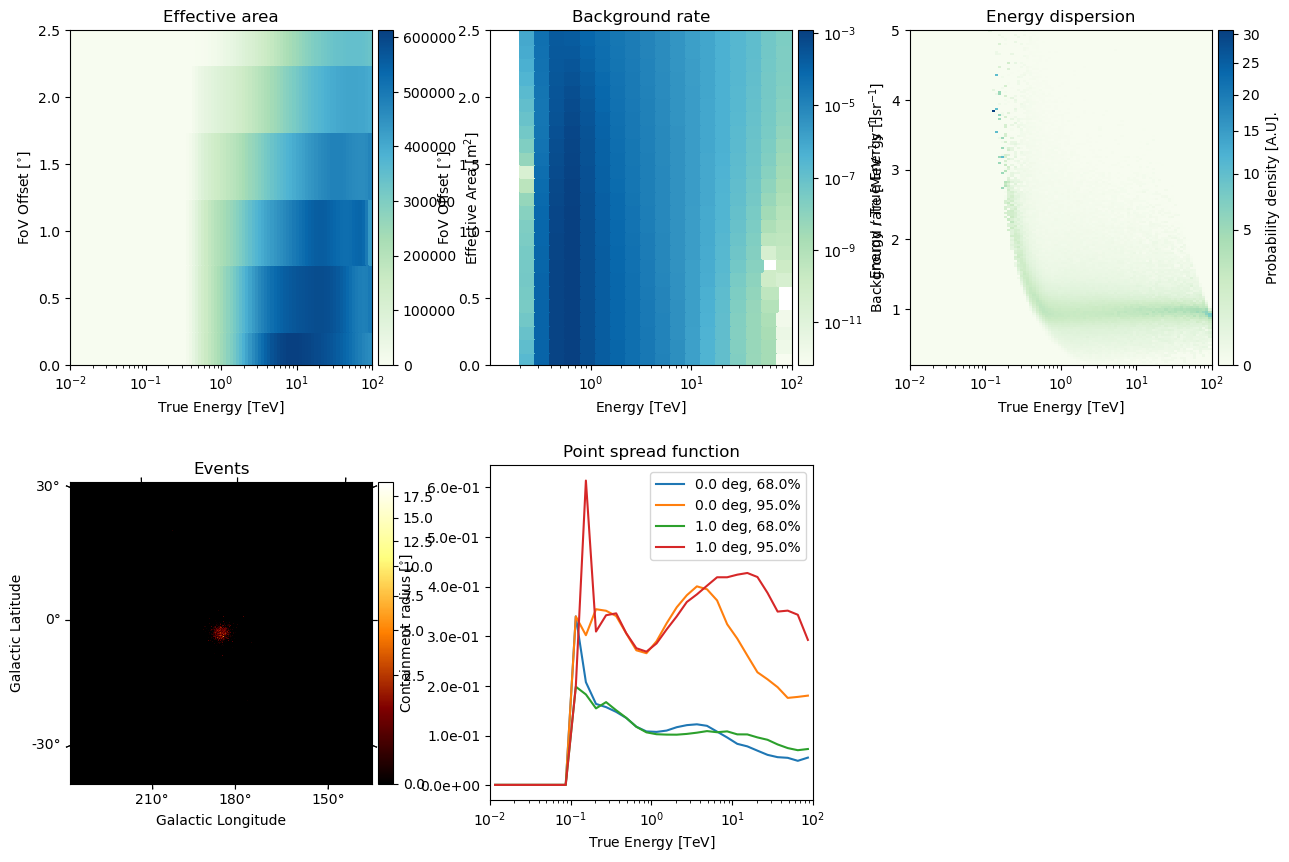

In [47]:
obs_hess.peek()

In [49]:
aeff = obs_hess.aeff

In [50]:
aeff

In [51]:
aeff.meta

OrderedDict([('EXTNAME', 'AEFF'),
             ('CREF5', '(ENERG_LO:ENERG_HI,THETA_LO:THETA_HI)'),
             ('HDUCLASS', 'GADF'),
             ('HDUDOC',
              'https://github.com/open-gamma-ray-astro/gamma-astro-data-formats'),
             ('HDUVERS', '0.2'),
             ('ORIGIN', 'H.E.S.S. Collaboration'),
             ('INSTRUME', 'H.E.S.S. Phase I'),
             ('TELESCOP', 'HESS'),
             ('EV_CLASS', 'std'),
             ('HDUCLAS1', 'RESPONSE'),
             ('HDUCLAS2', 'EFF_AREA'),
             ('HDUCLAS3', 'FULL-ENCLOSURE'),
             ('HDUCLAS4', 'AEFF_2D'),
             ('OBS_ID', 23559),
             ('TELPAT', 30),
             ('CONFIG', 'std_fullEnclosure_fits_release'),
             ('AZIMUTH', 2.25357982930731),
             ('ZENITH', 45.3681758903868),
             ('LO_THRES', 0.660693448007596),
             ('HI_THRES', 100.0),
             ('comments',
              ['This file is part of the first H.E.S.S. FITS test data release from 2

/home/atreyeesinha/anaconda3/envs/gammapy-1.2/lib/python3.10/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


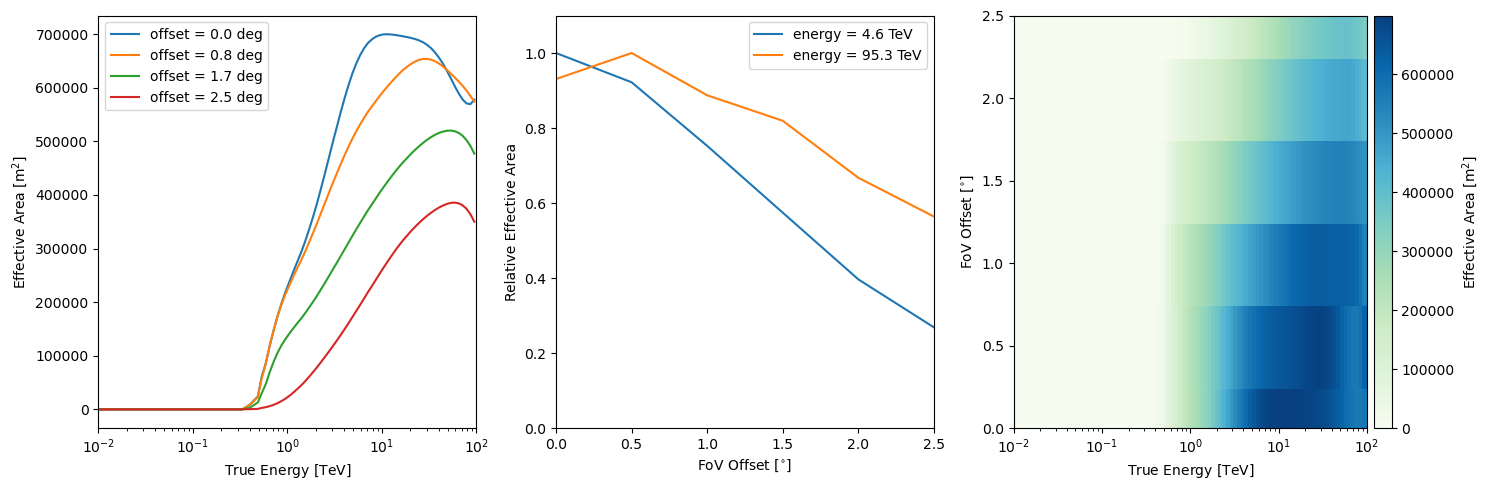

In [14]:
aeff.peek()

### point-like IRF

In [38]:
data_store_magic = DataStore.from_dir("$GAMMAPY_DATA/magic/rad_max/data")

In [39]:
observations = data_store_magic.get_observations()
print(observations)

Skipping run with missing HDUs; Required HDUs ['psf', 'bkg'] not found in observation 5029747
Skipping run with missing HDUs; Required HDUs ['psf', 'bkg'] not found in observation 5029748


Observations
Number of observations: 0



In [40]:
observations = data_store_magic.get_observations(required_irf="point-like")

In [41]:
obs_magic = observations[0]

'THETA' axis is stored as a scalar -- converting to 1D array.
'THETA' axis is stored as a scalar -- converting to 1D array.
'THETA' axis is stored as a scalar -- converting to 1D array.


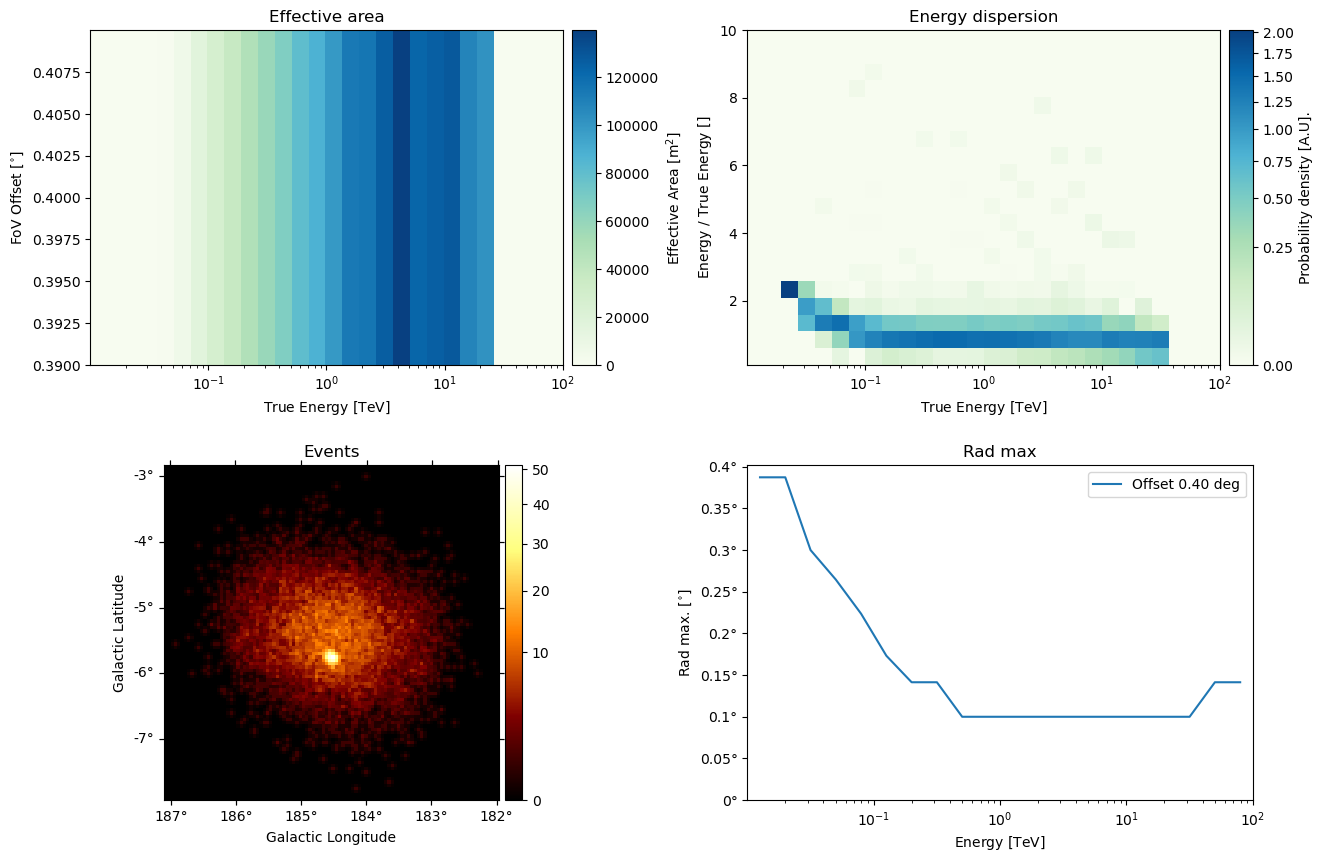

In [42]:
obs_magic.peek()

In [43]:
obs_magic.aeff

'THETA' axis is stored as a scalar -- converting to 1D array.


In [44]:
obs_magic.aeff.meta

'THETA' axis is stored as a scalar -- converting to 1D array.


OrderedDict([('EXTNAME', 'EFFECTIVE AREA'),
             ('HDUCLASS', 'GADF'),
             ('HDUDOC',
              'https://github.com/open-gamma-ray-astro/gamma-astro-data-formats'),
             ('HDUVERS', '0.2'),
             ('HDUCLAS1', 'RESPONSE'),
             ('HDUCLAS2', 'EFF_AREA'),
             ('HDUCLAS3', 'POINT-LIKE'),
             ('HDUCLAS4', 'AEFF_2D'),
             ('CREF5', '(ENERG_LO:ENERG_HI,THETA_LO:THETA_HI)'),
             ('OBS_ID', 5029747),
             ('LO_THRES', 0.08576008)])

Possible to have 3D IRFs: https://docs.gammapy.org/dev/tutorials/api/irfs.html#support-for-asymmetric-irfs

## Data reduction - DL3 to DL4

1. `point-like` irf :
 - only spectral (1D) analysis
 - region size fixed: use a `PointSkyRegion`, correction to be applied automatically from the `RadMax` values
 - usually no background model - background to be estimated using `WobbleRegionsFinder`
 - ON-OFF analysis - `wstat`
    
2. `full-enclosure` irf:

   - *spectral* (1D), `morphological` (2D) and 3D analysis possible
   -   

### Eg 1: How to choose a good exclusion region

## Modeling and extraction of Flux points

1. Perform a `Fit`
 - Define bins to be masked
2. Use `Estimator` to obtain flux maps

### Eg 1: Book keeping of multiple models and datasets

### Eg 2:Using `select_nested_models` to compute significances

### Eg 3: FluxPointsEstimation

- bins with `nan`
- configuring `ul` limits
- likelohood profiles
- using likelihood profiles to combine points/ recompute ul

### Eg 4: Parallelisation

## Simulations

1. Full event sampling
   - Unbinned simulation at DL3 level
   - Useful for simulating a full Datastore (eg: the CTA SDC)
   - Also, for timing analysis
  
2. Binned simulations
   - Simulate directly at the DL4 level
   - Useful for sensitivity studies, quantifying systematics..